In [ ]:
pip install torch numpy matplotlib scikit-learn

In [2]:
# 1. Required Libraries
import torch  # PyTorch main package
import torch.nn as nn  # Neural network modules
import torch.optim as optim  # Optimization algorithms
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting library
from sklearn.datasets import make_regression  # To generate synthetic regression data
from sklearn.model_selection import train_test_split  # To split data into train/test sets
from sklearn.preprocessing import StandardScaler  # To standardize data

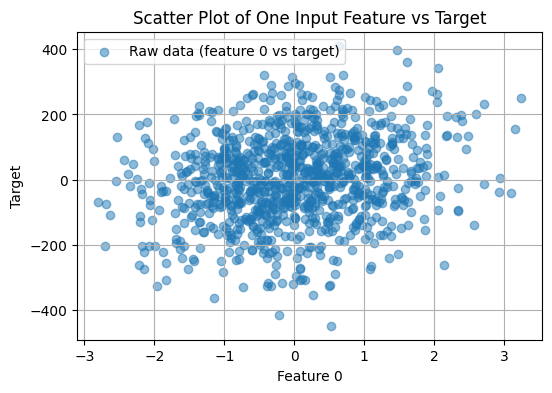

In [18]:
# 2. Generate and Prepare Data
# Generate a synthetic regression dataset with 10 features
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Make y a column vector

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale input features and target
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Show
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], y, alpha=0.5, label='Raw data (feature 0 vs target)')
plt.xlabel('Feature 0')
plt.ylabel('Target')
plt.title('Scatter Plot of One Input Feature vs Target')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# 3. Define Neural Network Model
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()

        # Define layers explicitly
        self.layer1 = nn.Linear(input_size, 64)
        self.activation1 = nn.ReLU()

        self.layer2 = nn.Linear(64, 32)
        self.activation2 = nn.ReLU()

        self.output_layer = nn.Linear(32, 1)  # No activation here (regression)

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.output_layer(x)
        return x

In [13]:
# 4. Instantiate Model
input_size = X_train.shape[1]
model = RegressionNN(input_size)

# 5. Define Loss Function (MSE for regression)
criterion = nn.MSELoss()

# 6. Define Optimizer (Adam with learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
# 7. Train the Model
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    # --------- Training ---------
    model.train()
    optimizer.zero_grad()                 # Clear gradients
    predictions = model(X_train)         # Forward pass
    loss = criterion(predictions, y_train)  # Compute loss
    loss.backward()                      # Backpropagation
    optimizer.step()                     # Update weights
    train_losses.append(loss.item())

    # --------- Testing ---------
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test)
        test_loss = criterion(test_preds, y_test)
        test_losses.append(test_loss.item())

    # Print every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch [20/200], Train Loss: 0.6398, Test Loss: 0.6476
Epoch [40/200], Train Loss: 0.2000, Test Loss: 0.2070
Epoch [60/200], Train Loss: 0.0533, Test Loss: 0.0481
Epoch [80/200], Train Loss: 0.0206, Test Loss: 0.0192
Epoch [100/200], Train Loss: 0.0104, Test Loss: 0.0108
Epoch [120/200], Train Loss: 0.0068, Test Loss: 0.0075
Epoch [140/200], Train Loss: 0.0050, Test Loss: 0.0060
Epoch [160/200], Train Loss: 0.0040, Test Loss: 0.0051
Epoch [180/200], Train Loss: 0.0034, Test Loss: 0.0045
Epoch [200/200], Train Loss: 0.0029, Test Loss: 0.0041


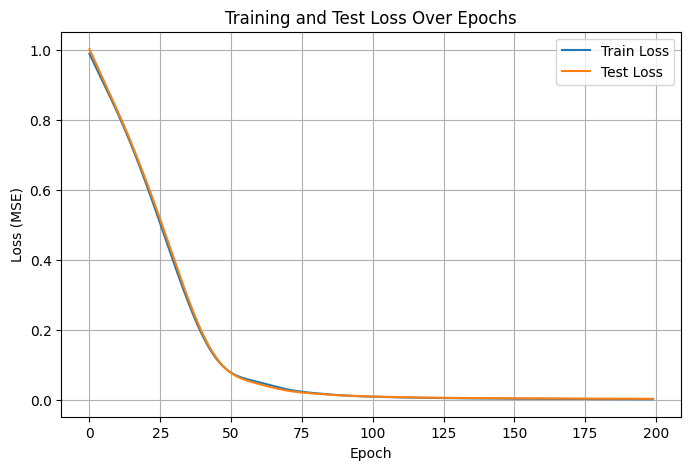

In [15]:
# 8. Plot Training and Test Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Test Loss Over Epochs')
plt.grid(True)
plt.show()


Sample Predictions vs Actual:
Predicted: 0.3409, Actual: 0.3242
Predicted: 0.6184, Actual: 0.5681
Predicted: 0.0259, Actual: -0.0281
Predicted: -2.2466, Actual: -2.2274
Predicted: 0.3369, Actual: 0.3375


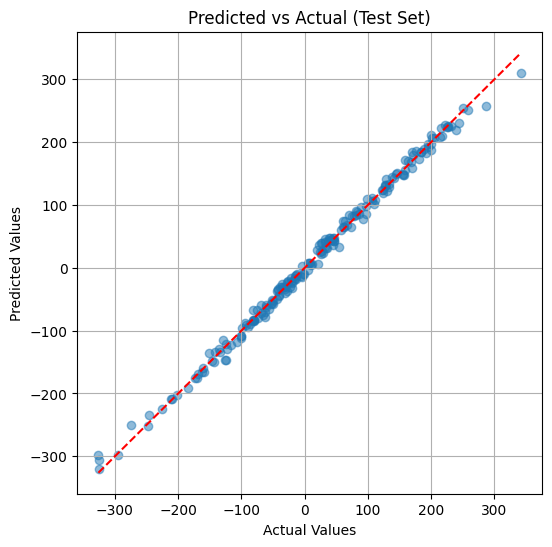

In [21]:
# 9. Make and Visualize Predictions
model.eval()
with torch.no_grad():
    sample_input = X_test[:5]
    predictions = model(sample_input)
    actual = y_test[:5]

    print("\nSample Predictions vs Actual:")
    for i in range(5):
        pred = predictions[i].item()
        real = actual[i].item()
        print(f"Predicted: {pred:.4f}, Actual: {real:.4f}")
# 10. Plot predictions vs actual values on test set
with torch.no_grad():
    y_pred_all = model(X_test).numpy()
    y_actual_all = y_test.numpy()

y_pred_all = scaler_y.inverse_transform(y_pred_all)
y_actual_all = scaler_y.inverse_transform(y_actual_all)

# Plotting
plt.figure(figsize=(6,6))
plt.scatter(y_actual_all, y_pred_all, alpha=0.5)
plt.plot([y_actual_all.min(), y_actual_all.max()],
         [y_actual_all.min(), y_actual_all.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Test Set)")
plt.grid(True)
plt.show()
